In [5]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [2]:
np. random.seed(1)
X = pd.DataFrame({'hours studied': np.random.randn(100).astype(float)*2 + 5})
p = 1/(1 + np.exp(-(X['hours studied'] * 1.5 - 7.5)))
y = np.random.binomial(1,p,100)

In [3]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression().fit(X_tr, y_tr)
proba = clf.predict_proba(X_te)[:, 1] # positive class probabilities
proba   

array([0.79022079, 0.39059538, 0.04751422, 0.246814  , 0.61973525,
       0.89095497, 0.9222006 , 0.4629218 , 0.97768379, 0.98460571,
       0.61500063, 0.22388508, 0.91783891, 0.16780466, 0.95953682,
       0.91592633, 0.41478919, 0.90895493, 0.40564117, 0.36461661])

In [11]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

In [12]:
fpr, tpr, roc_th = roc_curve(y_te, proba)
roc_auc = auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc:3f}")


AUC-ROC: 0.880000


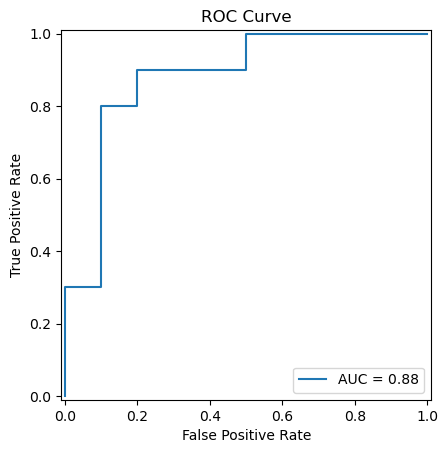

In [15]:
RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()
plt.title('ROC Curve')
plt.show()
